In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import nltk
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anastasiiaserputko/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6494 entries, 0 to 6493
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Animal    6494 non-null   object
 1   Sentence  6494 non-null   object
dtypes: object(2)
memory usage: 101.6+ KB
None

Missing values:
Animal      0
Sentence    0
dtype: int64

Unique classes: 13

Class distribution:
Animal
bear        500
goose       500
fox         500
elk         500
owl         500
frog        500
beaver      500
bee         500
dove        500
ladybug     500
cat         498
squirrel    498
flamingo    498
Name: count, dtype: int64


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anastasiiaserputko/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


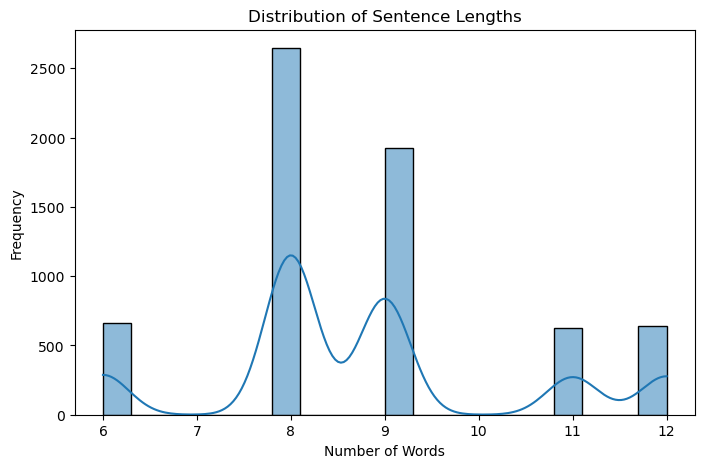

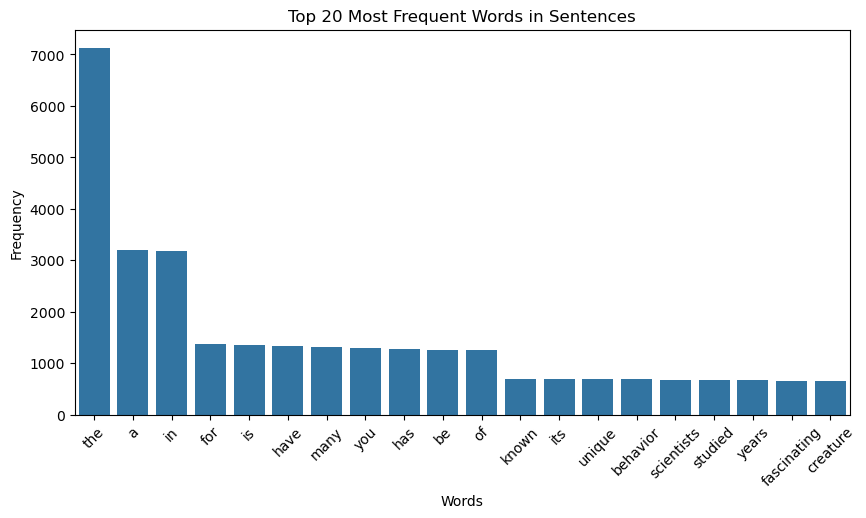

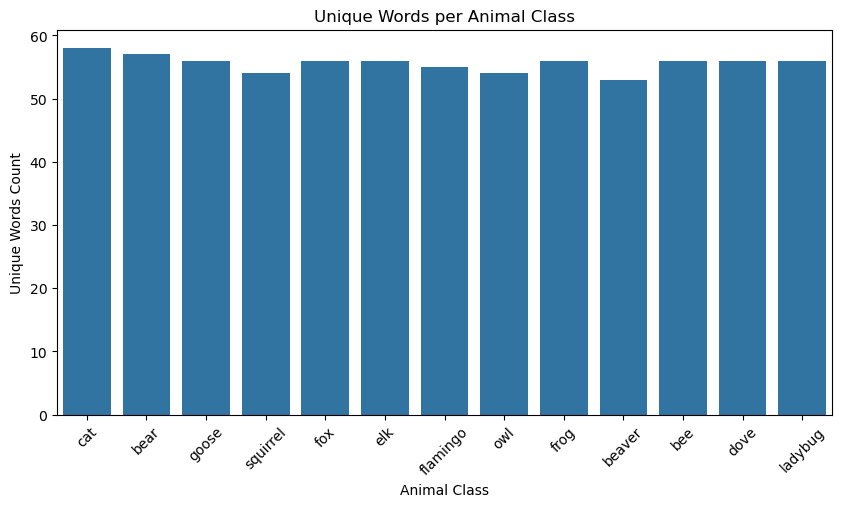


Unique words per class:
cat: 58 unique words
bear: 57 unique words
goose: 56 unique words
squirrel: 54 unique words
fox: 56 unique words
elk: 56 unique words
flamingo: 55 unique words
owl: 54 unique words
frog: 56 unique words
beaver: 53 unique words
bee: 56 unique words
dove: 56 unique words
ladybug: 56 unique words

Synonyms found per animal class:
cat: feline, puss, kitten, tomcat, kitty
bear: ursine, grizzly, bruin, cub
goose: waterfowl, gosling, gander
squirrel: chipmunk
fox: tod, vixen, reynard
elk: moose, wapiti, stag
flamingo: pinkbird, wader
owl: hooter
frog: croaker, amphibian, toad
beaver: No synonyms found
bee: bumblebee, honeybee, drone
dove: pigeon, columbid, columbidae
ladybug: ladybird, beetle, coccinellid


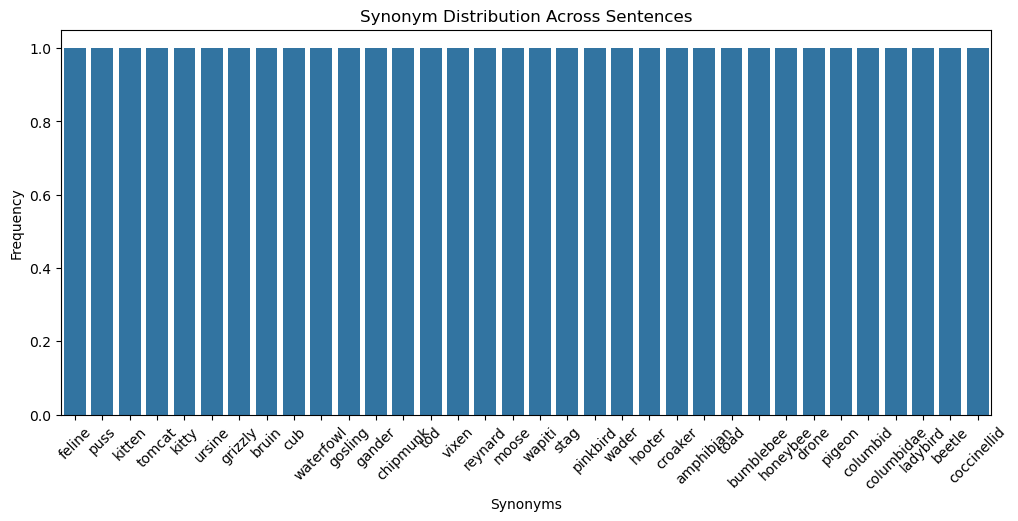

In [15]:
# Load dataset
file_path =  '/Users/anastasiiaserputko/Test/Task2/animal_sentences.csv'
df = pd.read_csv(file_path)

# 1. General dataset information
def dataset_info(df):
    print("\nDataset Info:")
    print(df.info())
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nUnique classes:", df['Animal'].nunique())
    print("\nClass distribution:")
    print(df['Animal'].value_counts())

dataset_info(df)

# 2. Sentence length analysis
df['sentence_length'] = df['Sentence'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8, 5))
sns.histplot(df['sentence_length'], bins=20, kde=True)
plt.title("Distribution of Sentence Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# 3. Word frequency analysis
all_words = word_tokenize(" ".join(df['Sentence']).lower())
word_freq = Counter(all_words)

# Remove punctuation
common_words = [(word, freq) for word, freq in word_freq.items() if word.isalpha()]
common_words = sorted(common_words, key=lambda x: x[1], reverse=True)[:20]

# Visualization
plt.figure(figsize=(10, 5))
words, freqs = zip(*common_words)
sns.barplot(x=list(words), y=list(freqs))
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Sentences")
plt.show()

# 4. Unique words analysis per class
def unique_words_per_class(df):
    class_words = {}
    for animal in df['Animal'].unique():
        words = word_tokenize(" ".join(df[df['Animal'] == animal]['Sentence']).lower())
        class_words[animal] = set([w for w in words if w.isalpha()])
    return class_words

unique_class_words = unique_words_per_class(df)

# Count of unique words per class
total_unique_words = {k: len(v) for k, v in unique_class_words.items()}
plt.figure(figsize=(10, 5))
sns.barplot(x=list(total_unique_words.keys()), y=list(total_unique_words.values()))
plt.xticks(rotation=45)
plt.xlabel("Animal Class")
plt.ylabel("Unique Words Count")
plt.title("Unique Words per Animal Class")
plt.show()

print("\nUnique words per class:")
for animal, words in unique_class_words.items():
    print(f"{animal}: {len(words)} unique words")

# 5. Synonym analysis per animal class
animal_synonyms = {
    "cat": ["feline", "kitty", "kitten", "tomcat", "puss"],
    "bear": ["grizzly", "bruin", "cub", "ursine"],
    "goose": ["gander", "gosling", "waterfowl"],
    "squirrel": ["chipmunk", "tree-dweller"],
    "fox": ["vixen", "reynard", "tod"],
    "elk": ["moose", "wapiti", "stag"],
    "flamingo": ["wader", "pinkbird"],
    "owl": ["hooter"],
    "frog": ["toad", "amphibian", "croaker"],
    "beaver": ["dam-builder"],
    "bee": ["honeybee", "bumblebee", "drone"],
    "dove": ["pigeon", "columbidae", "columbid"],
    "ladybug": ["ladybird", "beetle", "coccinellid"]
}

# Finding synonyms in sentences
def find_synonyms_in_sentences(df, animal_synonyms):
    synonym_usage = defaultdict(set)
    synonym_counts = Counter()
    for animal, synonyms in animal_synonyms.items():
        words_in_sentences = word_tokenize(" ".join(df[df['Animal'] == animal]['Sentence']).lower())
        words_in_sentences = set([w for w in words_in_sentences if w.isalpha()])
        found_synonyms = {synonym for synonym in synonyms if synonym in words_in_sentences}
        synonym_usage[animal] = found_synonyms
        for syn in found_synonyms:
            synonym_counts[syn] += 1
    return synonym_usage, synonym_counts

synonym_usage, synonym_counts = find_synonyms_in_sentences(df, animal_synonyms)

print("\nSynonyms found per animal class:")
for animal, synonyms in synonym_usage.items():
    print(f"{animal}: {', '.join(synonyms) if synonyms else 'No synonyms found'}")

# 6. Synonym distribution visualization
plt.figure(figsize=(12, 5))
sns.barplot(x=list(synonym_counts.keys()), y=list(synonym_counts.values()))
plt.xticks(rotation=45)
plt.xlabel("Synonyms")
plt.ylabel("Frequency")
plt.title("Synonym Distribution Across Sentences")
plt.show()
